## Problem statemnt:
1. European-based Mercedes-Benze is a premium automaker. Nearly 2000 patents are applied for annually by Benze, a pioneer in the premium automaker industry. customers can choose their car from a choice of customizing options and opinions.
2. In order to ensure the reliability and safety of the vehicle and its components, Strict testing methods are used by Benze on a variety of models and custom models to ensure their performance. It is very difficult with manual methods to optimize the test and test time spend on test procedures  for each customization option.
3. Using the various test feature combinations, we must determine the best test time and minimal carbon dioxide emission without compromising safety criteria.

## Metrics:
R² error (coefficient of Determination) : 1 -RSS/TSS

RSS = 	sum of squares of residuals
TSS	=	total sum of squares

When 
*   R² = 1 then the model is perfectly predicting
*   R² = 0 to 1 , model is not predicting prefectly but better than simple average model
*   R²  = 0 model is not predicting at all

In [55]:
#import required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

# loading data

In [40]:
data  = pd.read_csv(r"F:\self_project\train.csv")
data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [42]:
#shape of input data
data.shape

(4209, 378)

#### we have 4209 data samples with 377 features

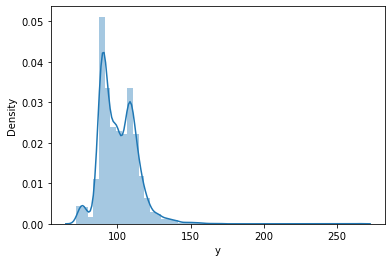

In [43]:
#know the distribution output varible
sns.distplot(data['y'])
plt.show()

### The data is more concentrate below 150, remain data we can consider as outliers

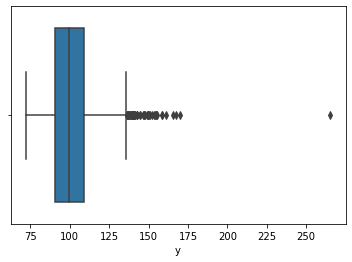

In [44]:
#ploting boxplot for output variable
sns.boxplot(data['y'])
plt.show()

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [53]:
# check how many features are multiclass
mutlicalss_features = []
binary_features =[]
for col in data.drop(['y'],axis=1).columns:
    len = data[col].unique().shape[0]
    if len == 1:
        print(col,"single class")
    elif len == 2:
        binary_features.append(col)
        #print(col,"binary class")
    elif len > 2:
        mutlicalss_features.append(col)


In [47]:
print("Number of multi category features are :",mutlicalss_features.__len__())    


Number of multi category features are : 9


In [48]:
#checking for feautures having single value and droping that features
single_val_features = [col for col in data.columns if data[col].nunique() == 1]
print("Total number of single value features in data set is {}".format(single_val_features.__len__()))
print("Features having single values: ",single_val_features)


Total number of single value features in data set is 12
Features having single values:  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [49]:
# shape of dataset after droping the single value features
data.drop(single_val_features,axis =1,inplace=True)
data.shape

(4209, 366)

In [50]:
# checking the distribution of muticlass features
mutlicalss_features.remove('ID')

print(mutlicalss_features)


['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


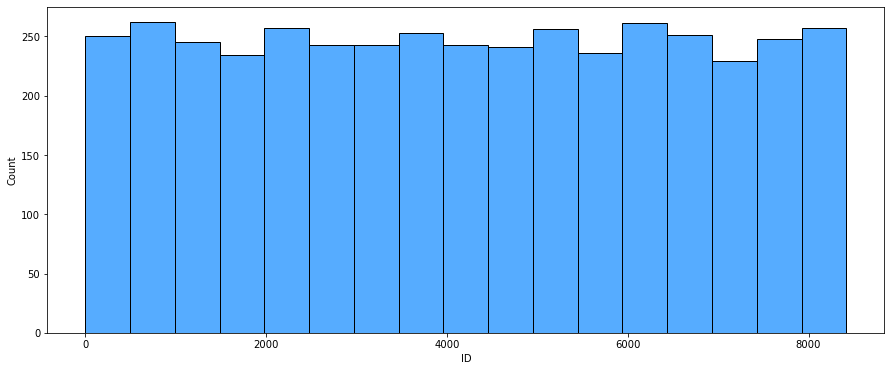

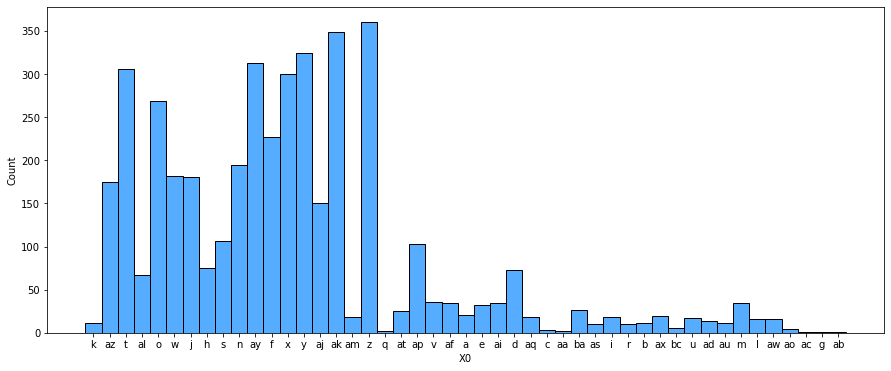

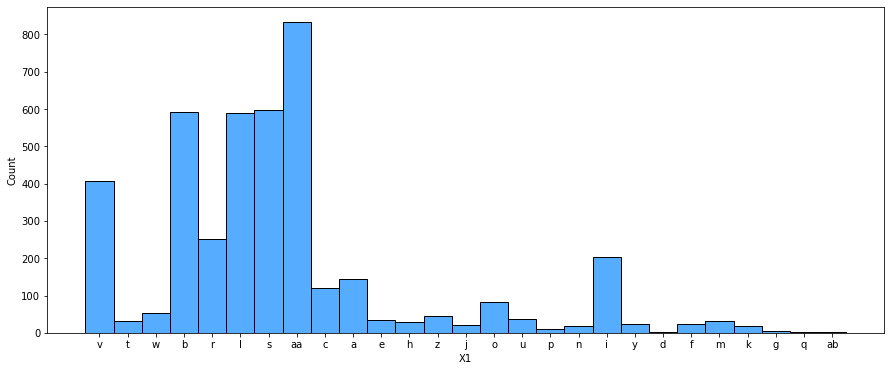

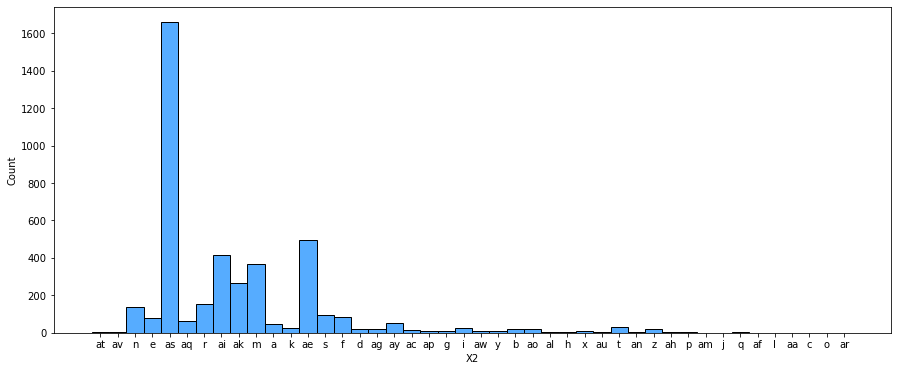

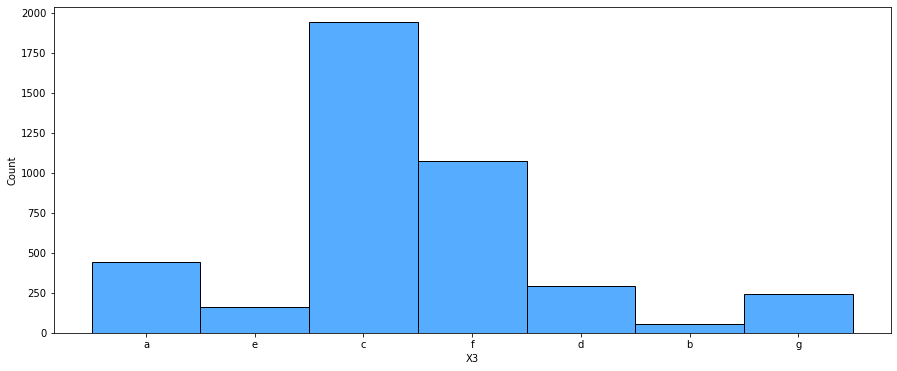

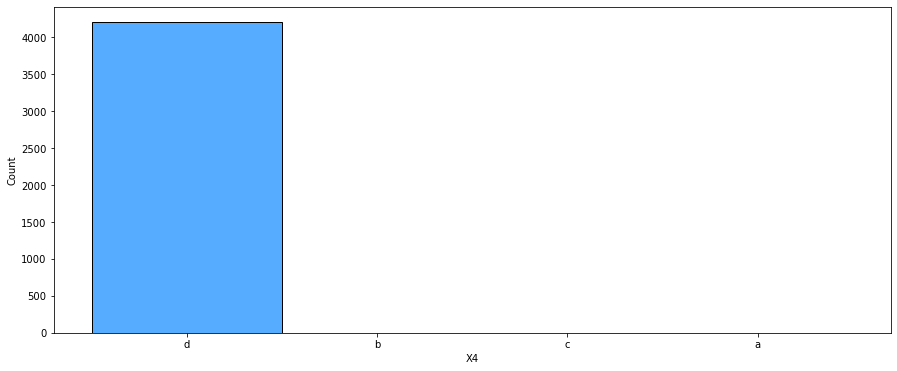

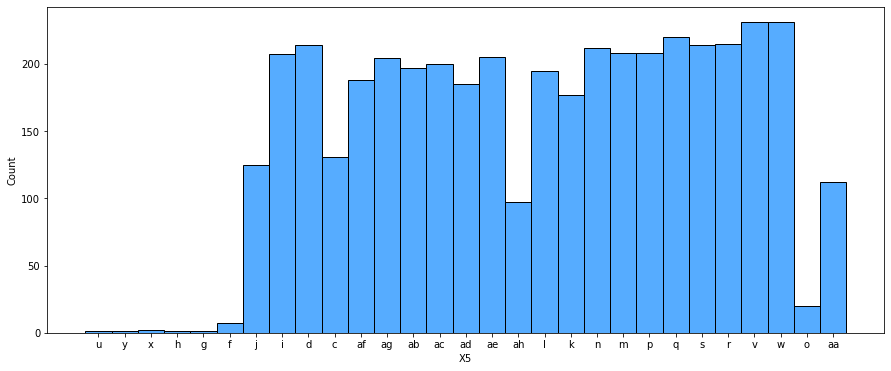

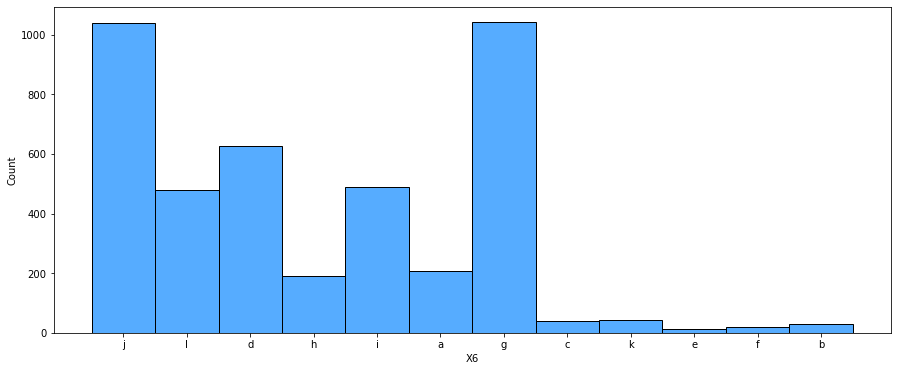

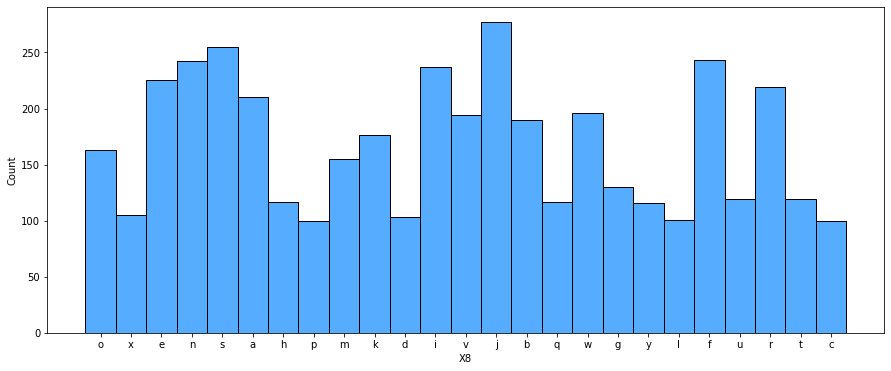

In [67]:
for clas in mutlicalss_features:
    plt.figure(figsize = (15,6))
    sns.histplot(x= clas,data = data,color = "dodgerblue")
    plt.show()

# observations:
### 1. the feature x4 amlost look like single variable feature
###  2. The features X3, X5 and X8 having almost having unifrom distributions

In [25]:
#for feature X4 is almost like single varible feature we can drop it
data.drop(['X4'],axis=1,inplace= True)

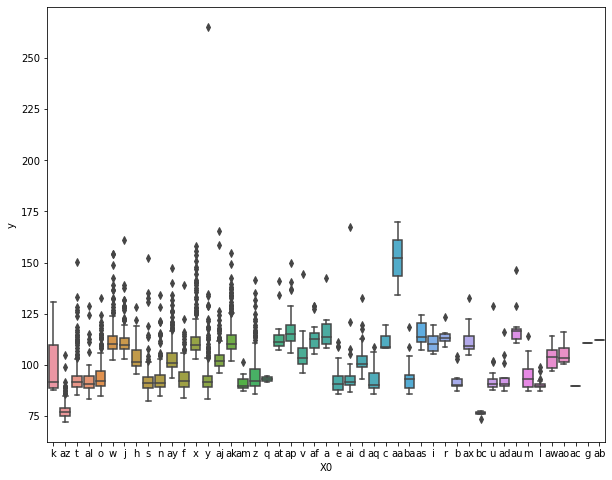

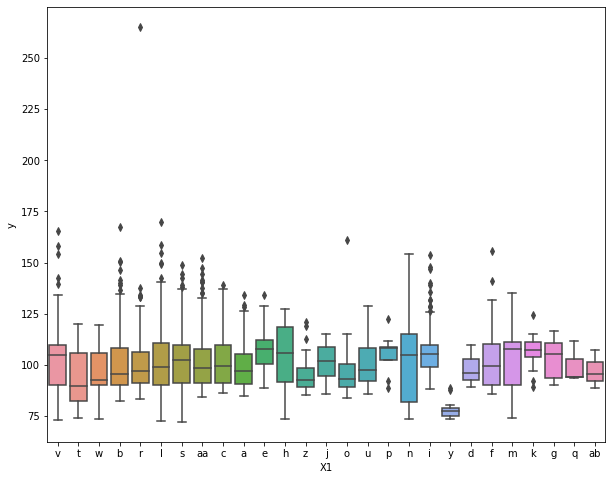

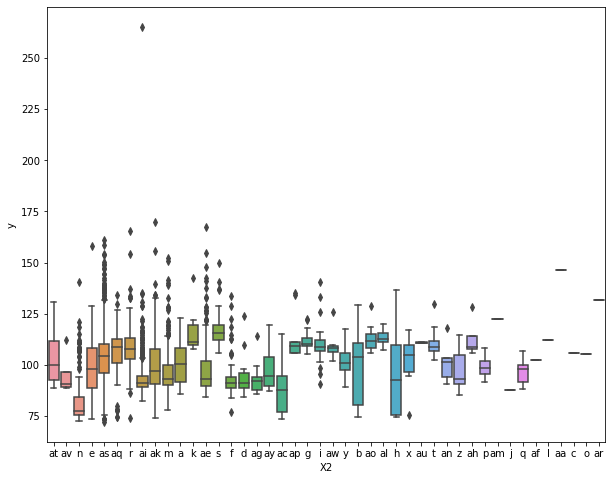

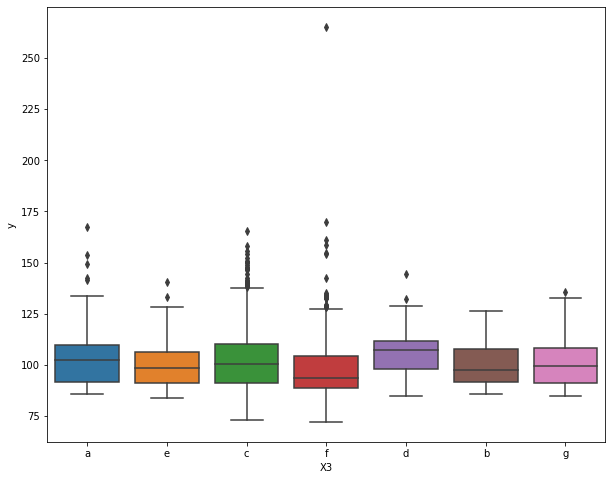

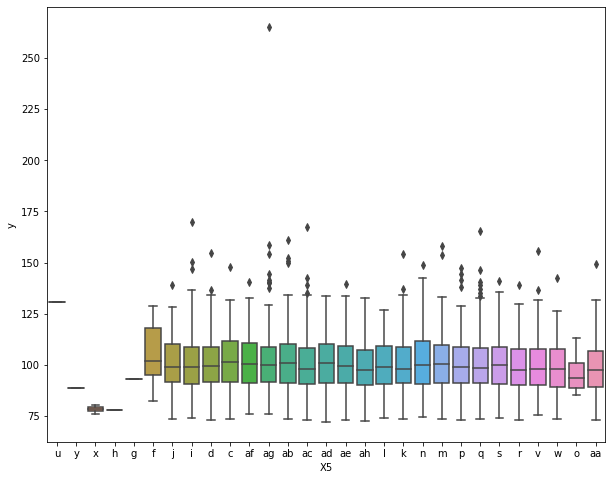

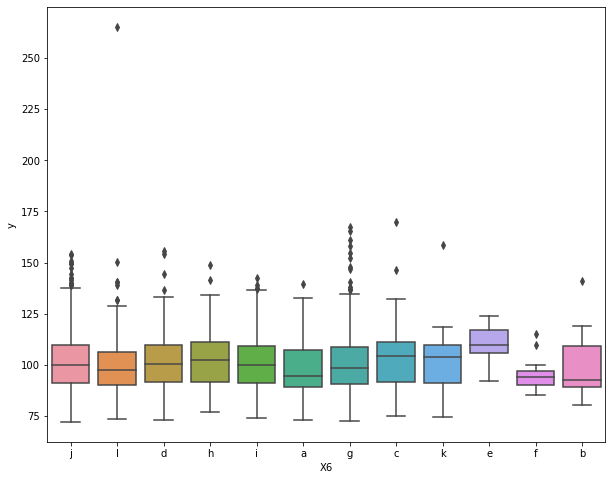

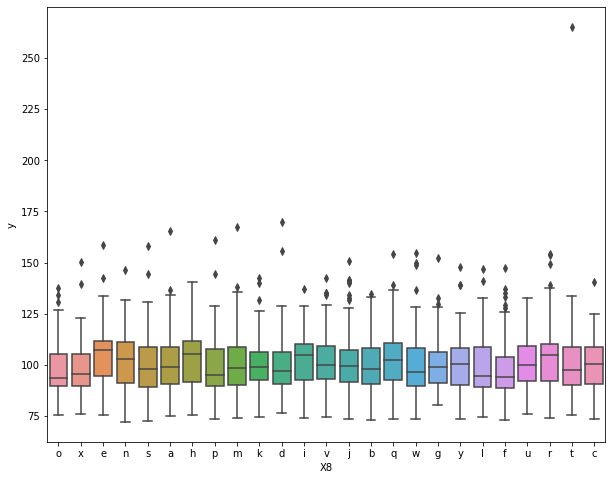

In [52]:
#checking the covariance between the multi category features and output variable
for col in ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']:
    plt.figure(figsize=(10,8))
    sns.boxplot(x= col,y = 'y',data =data)
    plt.show()

 

# observations:
#### 1. some categories in 'X0' feature can be eaily classified
#### 2. In other features , categories are overlapped with each other

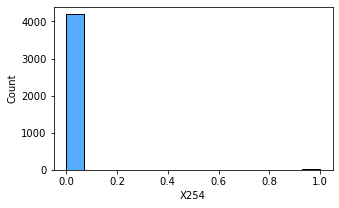

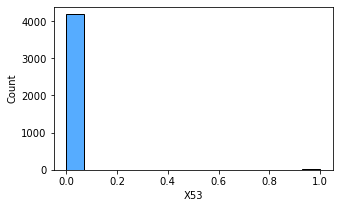

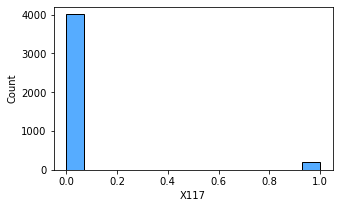

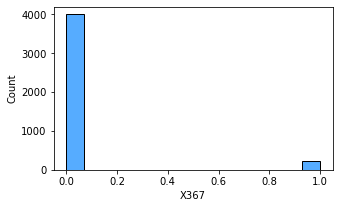

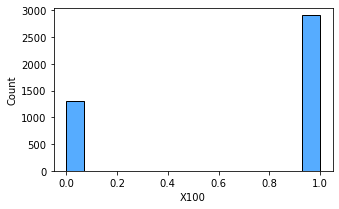

In [65]:
# Since we have more binary features we cannot anlysis all features 
# randomly checking the counts of binary classes in some features

for col in random.choices(binary_features, k=5):
    plt.figure(figsize=(5,3))
    sns.histplot(x= col,data = data,color = "dodgerblue")
    plt.show()

# observations:
#### Most of the features has unbalanced distributions, by analysing in more detail some features can be droped for dimensional reduction.